In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("BTB_dev.csv")

In [4]:
df.head()

,Unnamed: 0,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,...,0.0,0.0,0.0,59570.000,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,...,0.0,0.0,0.0,59570.000,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,...,4.5,0.0,0.0,60444.379,0.0,0.0,0.0,0.0,0.0,0.0
3,3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,...,257.7,0.0,0.0,60130.453,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,...,-368.8,0.0,0.0,60452.641,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.describe()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,...,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719382,-27.254849,0.269623,0.254438,0.357882,0.155699,26.373072,0.081953,60.895387,...,2.137322,0.474006,0.032735,59946.827096,265.646152,2066.388277,2523.983869,2427.426555,2320.092775,2121.793756
std,4.347364e+07,114.212761,20.248556,0.443792,0.330056,0.545547,0.300364,23.030558,0.150598,28.767984,...,243.315940,1.115749,0.127110,368.889675,1139.764604,9840.254171,12007.001716,10225.545751,8559.673003,7687.389494
min,6.150000e+02,0.175800,-64.760900,0.000000,0.000000,0.000000,0.000000,-9.000000,0.003000,6.000000,...,-1096.800000,0.000000,0.000000,58220.414000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.180865e+05,62.402300,-44.598000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.018000,42.000000,...,-85.000000,0.000000,0.000000,59570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.131719e+07,150.996100,-27.279600,0.000000,0.183000,0.210000,0.018000,40.078500,0.032000,65.000000,...,0.000000,0.000000,0.000000,59875.762000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.665901e+07,282.875950,-8.838300,1.000000,0.350000,0.431000,0.122250,41.877000,0.076000,90.000000,...,100.125000,0.000000,0.000000,60265.803000,25.350000,131.550000,287.225000,705.550000,805.000000,694.000000
max,1.307798e+08,359.824200,4.181500,1.000000,3.445000,2.999000,1.735000,47.026000,2.747000,95.000000,...,1181.600000,3.100000,2.330000,61197.316000,29042.200000,161508.600000,180588.000000,151136.900000,166923.300000,186648.000000


In [8]:
df["target"].value_counts()

90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: target, dtype: int64

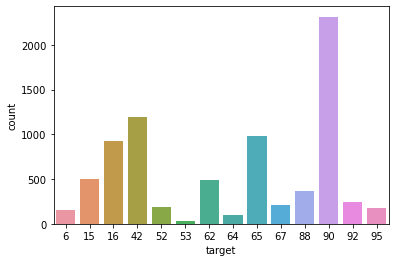

In [9]:
sns.countplot(x=df["target"]);

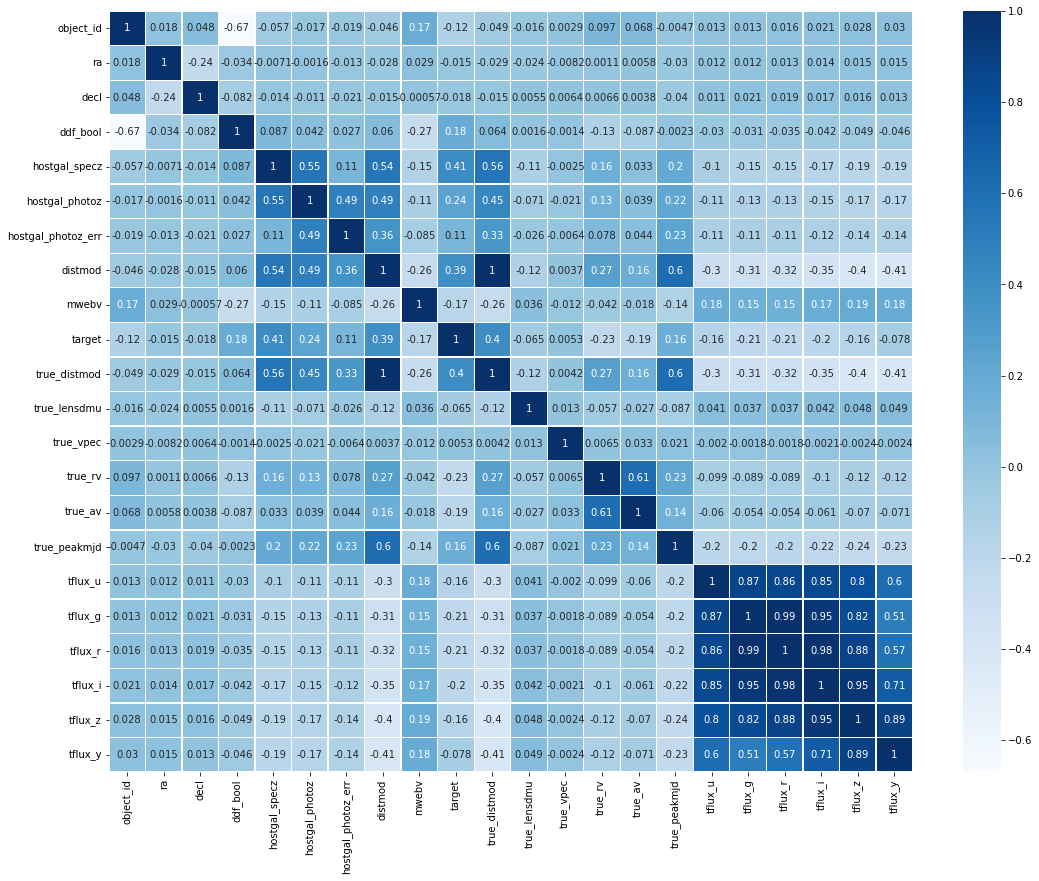

In [75]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(18, 14))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.3,
                 cmap=plt.cm.Blues);

In [76]:
X = df.drop("target", axis=1)
Y = df["target"]

In [77]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [79]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)

In [81]:
model.score(X_test, Y_test)

0.9049922799794132

In [82]:
from sklearn.metrics import classification_report
result = classification_report(Y_test, Y_preds)
print("Classification Report:",)
print(result)

Classification Report:
              precision    recall  f1-score   support

           6       1.00      1.00      1.00       737
          15       0.84      0.93      0.89       731
          16       1.00      1.00      1.00       681
          42       0.63      0.53      0.58       665
          52       0.81      0.91      0.86       668
          53       1.00      1.00      1.00       718
          62       0.89      0.70      0.78       713
          64       0.94      1.00      0.97       718
          65       1.00      1.00      1.00       705
          67       0.80      0.87      0.83       686
          88       1.00      1.00      1.00       644
          90       0.75      0.74      0.74       700
          92       1.00      1.00      1.00       681
          95       0.98      0.99      0.98       668

    accuracy                           0.90      9715
   macro avg       0.90      0.90      0.90      9715
weighted avg       0.90      0.90      0.90      9715



In [85]:
X = df.drop("target", axis=1).drop("ra", axis=1).drop("decl", axis=1).drop("true_vpec", axis=1)
Y = df["target"]
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [87]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)

In [89]:
model.score(X_test, Y_test)

0.89233144621719

### Best Accuracy= 0.9049